# Project Iris - Komal Waghchaure

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd 
df= pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
X_pre = scaler.fit_transform(X)

In [11]:
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
scaler

StandardScaler()

In [15]:
import pickle
with open('scaler.pkl','wb') as file1:
    pickle.dump(scaler,file1)

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=33, random_state=42)

In [20]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
11,-1.264185,0.788808,-1.226552,-1.315444
42,-1.748856,0.328414,-1.397064,-1.315444
146,0.553333,-1.282963,0.705921,0.922303
51,0.674501,0.328414,0.421734,0.395774
27,-0.779513,1.019004,-1.283389,-1.315444


In [21]:
ytrain.head()

,species
11,setosa
42,setosa
146,virginica
51,versicolor
27,setosa


In [22]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [23]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [24]:
xtrain.shape

(117, 4)

In [25]:
xtest.shape

(33, 4)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [27]:
model.score(xtrain,ytrain)

0.9658119658119658

In [28]:
model.score(xtest, ytest)

1.0

In [29]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [30]:
ypred_train[0:5]


array(['setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [31]:
ytrain.head()

,species
11,setosa
42,setosa
146,virginica
51,versicolor
27,setosa


In [32]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [33]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [34]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

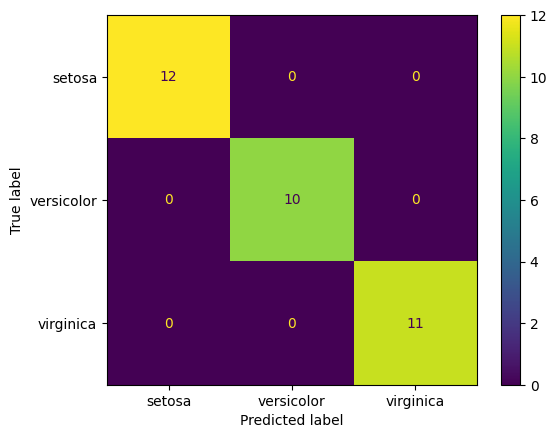

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [37]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([0.95816993, 1.        , 0.86425339, 1.        , 0.95816993])

In [38]:

scores.mean()

0.9561186525892408

In [39]:

model

LogisticRegression()

In [40]:

with open('model.pkl', 'wb') as file2:
    pickle.dump(model, file2)

In [41]:

with open('scaler.pkl', 'rb') as file3:
    s = pickle.load(file3)

In [42]:
s

StandardScaler()

In [43]:

with open('model.pkl', 'rb') as file4:
    m = pickle.load(file4)

In [44]:
m

LogisticRegression()